For your third capstone, you’ll complete an unsupervised learning project. You can choose your own research question or choose from one below.

How do you achieve the following using clustering techniques?

Netflix wants to identify similar movies based on movie characteristics.  
A company wants to segment its customers.  
Your startup is creating an innovative new email software. How can you help them to create an effective spam filter?  
Your chief marketing officer wants to know how much website traffic is due to spam and bots versus actual customers. How can you group the traffic?  
Your spouse loves fantasy baseball and has a few favorite players. How can you help them to choose who to have on their team?  
Security team in a bank wants to identify fraudulent transactional activities.  


Next steps:  

Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?

This will ultimately include the following deliverables:

A Jupyter notebook that tells a compelling story about your data (to be submitted at the end of this checkpoint).
A 15 to 30 minute presentation of your findings. You'll need to produce a deck and present it to the Thinkful community.
Conduct the analysis in Jupyter. Provide a complete research report using the framework introduced in the previous module. The report should include compelling visualizations and actionable insights, telling the story to your intended audience. Walk through the analysis using clean, reproducible code. Include plenty of notes and comments to guide others through your thinking.

Rather than create a deck in a presentation tool like PowerPoint or Google Slides, we will use Jupyter’s built-in slide deck capabilities. This cuts down on the time-consuming and error-prone process of copying-and-pasting into an external program. The presentation is also fully reproducible.

On the day of your presentation, an evaluator from the Thinkful educator team will introduce you, and then you'll give your presentation. Afterward, the evaluator will ask you follow up questions and will grade your performance on your presentation. Members of the audience will also be encouraged to ask follow up questions.

Be prepared to talk about:

Your end-user and the value your project provides to them.
Quantifiable results based on the research you’ve conducted.
The visuals you chose and what they represent for your research.
Next steps you'd take to expand on your work.
A specified research question your model addresses.
How you chose your model specification and what alternatives you compared it to.
The practical uses of your model for an audience of interest.
Any weak points or shortcomings of your model.

## Dataset: Kaggle Movies Dataset  

#### The URL for the Kaggle Movies dataset is:  https://www.kaggle.com/rounakbanik/the-movies-dataset

I picked the Kaggle Movies dataset because it is something that I can relate to, most people like movies and can relate to them over their lifetime.  
The dataset includes Title, Revenue, Budget, Genre, which a given movie can belong to more than 1 genre.  

According to [Wikipedia](https://en.wikipedia.org/wiki/Film_genre), Film Genre is described as:  
*A film genre is a motion-picture category based (for example) on similarities either in the narrative elements or in the emotional response to the film (namely: serious, comic, etc.).[citation needed] Most theories of film genre borrow from literary-genre criticism. Each film genre is associated[by whom?] with "conventions, iconography, settings, narratives, characters and actors".*

So my thinking in picking this dataset is, genre should be predictable based on the lead actor, revenue, the items found in the movie keywords, overview, and title.  My thinking was, we should be able to predict the primary genre for a given movie given these elements.  

There are 3 files that I used for this capstone within the Kaggle Movies dataset:  
1. Movie_Metadata
2. Credits
3. Keywords

The next cell describes the 3 files from the Kaggle Movies dataset in greater detail.

###  Kaggle Movies Dataset used in this capstone  

#### For the movies_metadata datafile:


|<p align="left">Feature</p>|<p align="left">Used</p>|<p align="left">DataType</p>|<p align="left">Feature Type</p>|<p align="left">Notes</p>|
|------|------|-----|---|---|
|adult| No||||
|belongs_to_collection | No||| |
|budget|Yes|float|Numeric|
|genres| Yes| list|Categorical|Used the first genre in the list for the Supervised label analysis with Random Forest Classification. |
|homepage|No||||
|id|Yes|int|Categorical|Used this column only to join the two datasets.  Not used in the model.|
|imdb_id|No|||
|original_language|No|Text|Categorical|
|original_title|No|||
|overview|No||||
|popularity|No||||
|poster_path|No||||
|production_companies|No||||
|production_countries|No||||
|release_date|Yes|||We will extract the release year, release month, release day of month, and the release MonthDay, e.g. 1025, 1231.|
|revenue|Yes|Numeric|||
|runtime|Yes|Numeric|||
|spoken_language|Yes|||
|status|No|Categorical|Used this column to filter on only movies released.  Not used in the model.||
|tagline|No|||
|title|No|||
|video|Yes|Categorical||
|vote_average|No|||
|vote_count|No|||

For the Credits datafile, columns available:

|<p align="left">Feature</p>|<p align="left">Used</p>|<p align="left">DataType</p>|<p align="left">Feature Type</p>|<p align="left">Notes</p>|
|------|------|-----|---|---|
|Cast|Yes|List of dictionaries|Categorical|Used the first item in the list as lead_actor.||
|Crew|No|||||
|id|Yes|int|Categorical|Used this column only to join the two datasets.  Not used in the model.|

For the Keywords datafile, columns available:

|<p align="left">Feature</p>|<p align="left">Used</p>|<p align="left">DataType</p>|<p align="left">Feature Type</p>|<p align="left">Notes</p>|
|------|------|-----|---|---|
|id|Yes|int|Categorical|Used this column only to join the datasets.  Not used in the model.|
|Keywords|Yes|List of dictionaries||Each keyword associated with a movie are included.  We will string these together for each movie, and load them into a tfidf data frame.|

There is an Id column in all three data files that allow us to join the files together using Pandas. 

## Strategy. 

My strategy was to join all three of the data files together, and keep only the features that I thought would be most predictive, and then use Tfidf with Random Forest Classification, with the label being the primary Genre, it may be highly predictable.

Once having that being highly predictable, I could then remove Genre from the dataset entirely, and then perform Unsupervised Learning on the dataset to see if it clusters similarly to what the Genre would be.  My thought was that it could possible predict with Unsupervised Learning, using PCA, T-SNE, and UMAP, along with KMeans, DBSCAN, and Gaussian Mixture Method(GMM).

### Global variables that I use with different methods

In [1236]:
# Global Variables
TEST_SIZE              = 0.20 # train_size = 1.00 - test_size
TRAIN_SIZE             = 1.00 - TEST_SIZE
RANDOM_STATE           = 20200427
ZIPFILENAME            = 'the-movies-dataset.zip'

In [1237]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.colors import ListedColormap

from scipy.spatial.distance import cdist
import seaborn as sn
from sklearn import cluster, metrics
from sklearn import datasets, ensemble, metrics, linear_model
from sklearn.cluster import AffinityPropagation, KMeans, MeanShift, estimate_bandwidth, SpectralClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, FeatureHasher
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, pairwise_distances, mean_squared_error
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, LabelEncoder
from sklearn.utils import shuffle

import spacy
import statsmodels.api as sm

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize          
from collections import Counter
import gensim
from gensim.models import Word2Vec

import umap

from ast import literal_eval
import chardet, codecs, datetime, os, platform, random, re, string, sys, time, unicodedata
from IPython.display import Markdown, display
from zipfile import ZipFile

In [1238]:
### We will use this class for Tfidf on the Overview, Keywords, and Title 

In [1239]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [1240]:
print("numpy version: {}\npandas version: {}\nmatplotlib version: {}".format(np.__version__,pd.__version__, matplotlib.__version__))

numpy version: 1.17.2
pandas version: 1.0.3
matplotlib version: 3.1.3


In [1241]:
def file_stuff(path, filename, zipfilename, dtypes=None, usecols=None):
    
    zip_file = ZipFile(zipfilename)

    print("fullfilename = {}".format(path+'/'+filename))
    df = pd.read_csv(zip_file.open(filename), dtype=dtypes, usecols=usecols)

    print("There are {} rows in this file.".format(df.shape[0]))
    
    return df

In [1242]:
def print_metrics_score(fit_model, X_train, X_test, y_train, y_test):
    y_pred_class  = fit_model.predict(X_test)
    metrics_test_score =  metrics.accuracy_score(y_test, y_pred_class)
    printFormatted('###  Metrics test accuracy score = {:.2%}'.format(metrics_test_score))

In [1243]:
def X_conf_matrix_function(model_fit, X_train, X_test, y_train, y_test):
    
#     confusion_matrix_function() missing 3 required positional arguments: 'X_test', 'y_train', and 'y_test'
    y_pred_class  = model_fit.predict(X_test)
    
    printFormatted("In conf_matrix_function: y_train.shape[0]={}".format(y_test.shape[0]))
    printFormatted("In conf_matrix_function: y_pred_class.shape[0]={}".format(y_pred_class.shape[0]))

        
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    
#     printFormatted("### Confusion Matrix:  {}".format(conf_matrix.scores))
    
    ### new stuff
#     https://stackoverflow.com/questions/43905654/custom-colors-in-matplotlib-when-using-matshow
    x = 0
    if x == 1:
        labels = ['genre', 'lead_actor_le']
        fig = plt.figure()
        fig.set_figheight(8)
        fig.set_figwidth(8)
        ax = fig.add_subplot(111)
        cmap = ListedColormap(['lightseagreen', 'royalblue', 'gold'])
        cax = ax.matshow(conf_matrix, cmap=cmap)
        plt.title('Confusion matrix of the classifier')
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
#     https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#     df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGHIJK"],
#                   columns = [i for i in "ABCDEFGHIJK"])
    plt.figure(figsize = (10,7))
    sn.heatmap(conf_matrix, annot=True)
    
    ### end of new stuff
    
    print("\n\n")

In [1244]:
def print_cross_validation_scores(fit_model, X_train, X_test, y_train, y_test):
    
        accuracy = cross_val_score(fit_model, X_test, y_test, scoring='accuracy', cv = 5)

        printFormatted("### Cross validation scores:  {}".format(accuracy))
        printFormatted("### Accuracy of Model with Cross Validation average is: {:.2%}".format(accuracy.mean()))

In [1245]:
def print_timestamp(displaytext):    
    datetime_now = str(datetime.datetime.now())
    printFormatted("{:19.19}: In: {} {} ".format(datetime_now, sys._getframe(1).f_code.co_name, displaytext))

In [1246]:
def write_to_logfile(message, mdformat=''):
    bufsize = 0
    with open('TestResults.md', 'a+') as the_file:
        the_file.write('{} {}'.format(mdformat, message))

In [1247]:
def training_test_set(X, y):
    
    print_timestamp("In training_test_set, train_size={}, and test_size={}".format(TRAIN_SIZE, TEST_SIZE))
    
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=TEST_SIZE, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
    
    print("train_size = {}, X_train is {}, and y_train is {}".format(TRAIN_SIZE, X_train1.shape[0], y_train1.shape[0]))
    print("test_size  = {}, X_test  is {}, and y_test is {}".format(TEST_SIZE, X_test1.shape[0], y_test1.shape[0]))
                                                            
    return X_train1, X_test1, y_train1, y_test1

In [1248]:
def print_training_and_test_scores(model, X_train, X_test, y_train, y_test):
    
    ## Let's score it with the test data set    this is new 13-Aug-2019
    training_score = model.score(X_train, y_train) 
    printFormatted("### Training score = {:.2%}".format(training_score))
    
    ## Let's score it with the test data set  this is new 13-Aug-2019
    test_score = model.score(X_test, y_test)
    printFormatted("### Test score = {:.2%}".format(test_score))

In [1249]:
def printFormatted(string):
    newline = '\n'
    display(Markdown(string))
    write_to_logfile(string+newline)

#### Here we load the Movies_Metadata file

In [1250]:
#We only want these columns
usecols = [
'budget',
'genres',
'id',
'release_date',
'revenue',
'runtime',
'status',
'title',
'overview'
]
df_movie_metadata = file_stuff("./the-movies-dataset", "movies_metadata.csv", 
                               zipfilename=ZIPFILENAME, usecols=usecols)


df_movie_metadata['overview'] = df_movie_metadata['overview'].str.replace('\d+', '') # We want to remove all numbers from the Overview
df_movie_metadata["overview"] = df_movie_metadata['overview'].str.replace('[^\w\s]','') # We want to remove all punctuation from Overview
df_movie_metadata = df_movie_metadata[df_movie_metadata['status'] == 'Released'] # We only want movies that were released
df_movie_metadata = df_movie_metadata[df_movie_metadata['genres'].notna()] # We do not want any rows that have a Genre of NA(Null)
df_movie_metadata.dropna(inplace=True)
df_movie_metadata.dropna(subset=['release_date'], inplace=True) # We want to remove movies without release dates
df_movie_metadata = df_movie_metadata[df_movie_metadata.genres != '[]'] # We want to remove movies with a genres that have an empty list
print("There are {} clean df_movie_metadata rows in this file.".format(df_movie_metadata.shape[0]))

fullfilename = ./the-movies-dataset/movies_metadata.csv
There are 45466 rows in this file.
There are 41935 clean df_movie_metadata rows in this file.


##### Here are the first 5 rows from the Movies Medata file

In [1251]:
df_movie_metadata.head(5)

,budget,genres,id,overview,release_date,revenue,runtime,status,title
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Led by Woody Andys toys live happily in his ro...,1995-10-30,373554033.0,81.0,Released,Toy Story
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,104.0,Released,Jumanji
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,1995-12-22,0.0,101.0,Released,Grumpier Old Men
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Cheated on mistreated and stepped on the women...,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II


#### Here we load the Credits file

In [1252]:
# credits data frame

#We only want these columns
usecols = [
'cast',
'id'
]

df_movie_credits = file_stuff("./the-movies-dataset", "credits.csv", 
                              zipfilename=ZIPFILENAME, usecols=usecols)

# Let's cleanup the df_credits dataframe

df_movie_credits = df_movie_credits[df_movie_credits.cast != '[]']
df_movie_credits = df_movie_credits[df_movie_credits['cast'].notna()]

df_movie_credits.dropna(inplace=True)
print("There are {} clean credits rows in this file.".format(df_movie_credits.shape[0]))

fullfilename = ./the-movies-dataset/credits.csv
There are 45476 rows in this file.
There are 43058 clean credits rows in this file.


#### Here we load the Keywords file

In [1253]:
# keywords data frame

usecols = [
'id',
'keywords'
]

df_movie_keywords = file_stuff("./the-movies-dataset", "keywords.csv", 
                               zipfilename=ZIPFILENAME, usecols=usecols)

# Let's cleanup the df_credits dataframe
df_movie_keywords.keywords = df_movie_keywords.keywords.apply(literal_eval)
df_movie_keywords = df_movie_keywords[(df_movie_keywords.keywords.str.len() > 0)]
df_movie_keywords = df_movie_keywords[df_movie_keywords.keywords.notna()]
df_movie_credits.dropna(inplace=True)

print("There are {} clean keywords rows in this file.".format(df_movie_keywords.shape[0]))

fullfilename = ./the-movies-dataset/keywords.csv
There are 46419 rows in this file.
There are 31624 clean keywords rows in this file.


#### Here we join all of the Keywords together for each movie into a single string to prepare for transforming them with Tfidf

#### We display a sample from 10 movies with the Keywords show as a single string column

In [1254]:
# Let's string all keywords together in preparation for tfidf

def string_all_keywords(r):
    return " ".join([sub['name'] for sub in r])

df_movie_keywords['keywords_list']   = df_movie_keywords['keywords'].apply(lambda row: string_all_keywords(row))
df_movie_keywords.sample(10)

,id,keywords,keywords_list
569,10897,"[{'id': 795, 'name': 'running'}, {'id': 4358, ...",running shenanigan friendship clubhaus group o...
40474,368620,"[{'id': 5565, 'name': 'biography'}, {'id': 145...",biography crime woman director
20799,74394,"[{'id': 187056, 'name': 'woman director'}]",woman director
25993,151044,"[{'id': 5565, 'name': 'biography'}, {'id': 187...",biography woman director
10811,16781,"[{'id': 9888, 'name': 'spanking'}, {'id': 1018...",spanking based on play or musical
18049,70196,"[{'id': 447, 'name': 'post traumatic stress d...",post traumatic stress disorder war veteran wa...
22641,96482,"[{'id': 191786, 'name': 'stenographer'}]",stenographer
6921,1594,"[{'id': 2619, 'name': 'suspicion of murder'}, ...",suspicion of murder unskillfulness pink panther
1987,10882,"[{'id': 2116, 'name': 'sleep'}, {'id': 2343, '...",sleep magic prince castle fairy tale kingdom m...
6832,17831,"[{'id': 1430, 'name': 'self sacrifice'}, {'id'...",self sacrifice french revolution guillotine


#### Here we set the column types for the Pandas dataframe to the correct datatypes

In [1255]:
# set the data types
# df_movie_metadata.head(5)
df_movie_metadata.dtypes
df_movie_metadata['release_date'] = df_movie_metadata.release_date.astype('datetime64[ns]')
df_movie_metadata.id = df_movie_metadata.id.astype('int')
df_movie_metadata.runtime = df_movie_metadata.runtime.astype('int')
# df_movie_metadata.video = df_movie_metadata.video.astype('bool')
df_movie_metadata.budget = df_movie_metadata.budget.astype('float64')
df_movie_credits.id = df_movie_credits.id.astype('int')
df_movie_metadata.overview = df_movie_metadata.overview.astype('object')

####  Let's merge the dataframes df_movie_metadata with df_movie credits

In [1256]:
df_movies_dataset = pd.merge(left=df_movie_metadata, right=df_movie_credits, left_on='id', right_on='id')
df_movies_dataset = pd.merge(left=df_movies_dataset, right=df_movie_keywords[['id','keywords_list']], left_on='id', right_on='id')
df_movies_dataset['overview_keywords'] = df_movies_dataset.overview + ' ' + df_movies_dataset.keywords_list + ' ' + df_movies_dataset.title
df_movies_dataset['overview_keywords'] = df_movies_dataset.overview_keywords.str.replace(r'\b\w\b','').str.replace(r'\s+', ' ') # remove single letter values

#### Here are the first 5 rows from the merged Movies Metadata file along with the Keywords file

In [1257]:
df_movies_dataset.head(5)

,budget,genres,id,overview,release_date,revenue,runtime,status,title,cast,keywords_list,overview_keywords
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Led by Woody Andys toys live happily in his ro...,1995-10-30,373554033.0,81,Released,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...",jealousy toy boy friendship friends rivalry bo...,Led by Woody Andys toys live happily in his ro...
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,104,Released,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",board game disappearance based on children's b...,When siblings Judy and Peter discover an encha...
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,1995-12-22,0.0,101,Released,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",fishing best friend duringcreditsstinger old men,family wedding reignites the ancient feud bet...
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Cheated on mistreated and stepped on the women...,1995-12-22,81452156.0,127,Released,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",based on novel interracial relationship single...,Cheated on mistreated and stepped on the women...
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,106,Released,Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...",baby midlife crisis confidence aging daughter ...,Just when George Banks has recovered from his ...


#### Here we need to extract the first Genre from the list of genre dictionaries, and set it as the primary Genre, and to do similarly for the Lead Actor.  

#### We are making the assumption that the Lead Actor, actor with Id=0 is the lead actor, and that Genre, with Id=0 is the Primary Genre.

In [1258]:
# Extract genre and lead_actor
df_movies_dataset.head(20)
def get_first_name_in_list(r, column_number, colname):
    return eval(r.values.tolist()[column_number])[0]['{}'.format(colname)]

df_movies_dataset['genre']      = df_movies_dataset.apply(lambda row: get_first_name_in_list(row, 1,'name'), axis=1) # get genre for supervised learning
df_movies_dataset['lead_actor'] = df_movies_dataset.apply(lambda row: get_first_name_in_list(row, 9,'name'), axis=1) 

In [1259]:
df_movies_dataset.head(5)

,budget,genres,id,overview,release_date,revenue,runtime,status,title,cast,keywords_list,overview_keywords,genre,lead_actor
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Led by Woody Andys toys live happily in his ro...,1995-10-30,373554033.0,81,Released,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...",jealousy toy boy friendship friends rivalry bo...,Led by Woody Andys toys live happily in his ro...,Animation,Tom Hanks
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,104,Released,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",board game disappearance based on children's b...,When siblings Judy and Peter discover an encha...,Adventure,Robin Williams
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,1995-12-22,0.0,101,Released,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",fishing best friend duringcreditsstinger old men,family wedding reignites the ancient feud bet...,Romance,Walter Matthau
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Cheated on mistreated and stepped on the women...,1995-12-22,81452156.0,127,Released,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",based on novel interracial relationship single...,Cheated on mistreated and stepped on the women...,Comedy,Whitney Houston
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,106,Released,Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...",baby midlife crisis confidence aging daughter ...,Just when George Banks has recovered from his ...,Comedy,Steve Martin


#### Here I define a number of functions that have been parameterized for use in this model, and allow the passing of parameters, to make the code more effiient and scalable.

In [1260]:
def run_tfidf_vectorizer(df, max_df=0.5, min_df=2, stop_words='english', lowercase=True, use_idf=True, norm=u'l2', smooth_idf=True):
    print_timestamp("in run_tfidf_vectorizer: df is a {} datatype.".format(type(df)))
    vectorizer = TfidfVectorizer(
                             max_df=max_df, # drop words that occur in more than half the paragraphs
                             min_df=min_df, # only use words that appear at least twice
                             stop_words=stop_words, 
                             lowercase=lowercase, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=use_idf,#we definitely want to use inverse document frequencies in our weighting
                             norm=norm, #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=smooth_idf #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

    #Applying the vectorizer
    tfidf_df = vectorizer.fit(df)
    
    return tfidf_df, vectorizer

In [1261]:
def run_tfidf_vectorizer2(df, parameters={}):
    print_timestamp("in run_tfidf_vectorizer: df is a {} datatype.".format(type(df)))
    if parameters:
        print("parms = {}".format(parameters))
    vectorizer = TfidfVectorizer()
    vectorizer.set_params(**parameters)

    #Applying the vectorizer
    tfidf_df = vectorizer.fit_transform(df)
    print("tfidf_df is a {} datatype".format(type(tfidf_df)))
    
    tfidf_df_dense = tfidf_df.toarray()
    print("tfidf_df_dense is a {} datatype".format(type(tfidf_df_dense)))

    return tfidf_df_dense

In [1262]:
def run_tfidf_vectorizer3(df, parameters={}):
    # from https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
    vectorizer = TfidfVectorizer(**parameters)
    vectors = vectorizer.fit_transform(df.values.astype('U'))
    feature_names = vectorizer.get_feature_names()
    tfidf_df_dense = vectors.toarray()
    df = pd.DataFrame(tfidf_df_dense, columns=feature_names)

    return df

In [1263]:
def do_the_elbow(X, maxK=11):
    printFormatted("## We are plotting the elbow method!")
    print_timestamp('\n'*3+'Begin')
    # calculate distortion for a range of number of cluster
    distortions = []
    for i in range(1, maxK):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(X)
        distortions.append(km.inertia_)

    # plot
    plt.plot(range(1, maxK), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    
    print_timestamp('\n'*3+'End')

In [1264]:
def rfc_and_feature_importances(X, y, params={}):    # Here we are using Random Forest classifier method to determine the top 30 features.
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, train_size=TRAIN_SIZE)
    
    rfc = ensemble.RandomForestClassifier(**params)
    ## Fit the model on your training data.
    rfc.fit(X_train, y_train) 
    
    ## And score it on your testing data.
    rfc.score(X_test, y_test)

    feature_importance = rfc.feature_importances_

    # Make importances relative to max importance.
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    cols=X.columns[sorted_idx].tolist() 
    cols=cols[::-1]
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
#     print("We are returning these columns {}".format(cols))
    return cols[:30] # return it sorted

In [1265]:
def run_affinity_propagation(data, target, params={}):
      
    print_timestamp('\n'*3+'starting AffinityPropagation')

    if len(params) > 0:
        printFormatted("params are {}".format(params))
    else:
        printFormatted("Using default params in run_affinity_propagation.")
        
    print_timestamp('\n'*3+'Begin')
    
    ap = AffinityPropagation(**params)

    model = ap.fit(data)
    pred = ap.predict(data)

    Z = merge_predict_and_cluster(data, target, pred) # let's merge the data dataframe, prediction, and the cluster
    
    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = ap.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = ap.labels_
    
    print('Estimated number of clusters: {}'.format(n_clusters_))

    labels = model.labels_
    
    print("from run_affinity_propagation {}".format(metrics.silhouette_score(data, labels, metric='euclidean')))
    
    print_timestamp('\n'*3+'finished with AffinityPropagation')
    
    return Z, n_clusters_

In [1266]:
def data_demographics(dataframe, num_rows):

    display("dataframe.isnull().sum()", dataframe.isnull().sum())

    display("dataframe.columns\n", dataframe.columns)
    display("dataframe.head({})\n".format(num_rows), dataframe.head(num_rows))

    display("dataframe.sample({})\n".format(num_rows), dataframe.sample(num_rows))
    display("dataframe.dtypes\n", dataframe.dtypes)
    display("dataframe.describe()\n", dataframe.describe())

In [1267]:
#TODO Sett params for n_estimators - > **params
def run_rf(X_train=None, X_test=None, y_train=None, y_test=None, params={}, cross_validate=None, confusion_matrix=None):
    
    print_timestamp("# Inside run_rf, parameters passed were: {}".format(params))
#     printFormatted("# Inside run_rf, parameters passed were: {}".format(params))

    rfc = ensemble.RandomForestClassifier(**params)
        
    ## Fit the model on your training data.
    rfc_fit = rfc.fit(X_train, y_train)  
    
    #   Let's score it with the test data set    this is new 13-Aug-2019
    print_training_and_test_scores(rfc_fit, X_train, X_test, y_train, y_test) # new on 13-Aug-2019
    
#   Let's produce the metrics scores
    print_metrics_score(rfc_fit, X_train, X_test, y_train, y_test) # new on 13-Aug-2019
    
#   Let's run cross validation 
    if cross_validate == True:
        print_cross_validation_scores(rfc_fit, X_train, X_test, y_train, y_test)
        
#   Let's run the confusion matrix
    if confusion_matrix == True:
        print("before going to conf_matrix_function, the columns in X_test are {}".format(X_test.columns))
        conf_matrix_function(rfc_fit, X_train, X_test, y_train, y_test)
      
    print_timestamp('End run_rfr part 1')
    return rfc_fit

In [1268]:
# Post feature generation column cleanup
columns_to_drop = ['genres', 'cast', 'status']
df_movies_dataset.drop(columns_to_drop, axis=1, inplace=True)

In [1269]:
# Merge genres together and then drop low count genres

# df_movies_dataset['Science Fiction'] = [(df_movies_dataset.genre == 'Science Fiction') | (df_movies_dataset.genre == 'Fantasy')]]
# df.loc[(df.Event == 'Dance'),'Event']='Hip-Hop'
df_movies_dataset.loc[(df_movies_dataset.genre == 'Fantasy'),'genre']='SciFiFant'
df_movies_dataset.loc[(df_movies_dataset.genre == 'Science Fiction'),'genre']='SciFiFant'

todrop = ['Budget', 'Revenue','History', 'Music', 'Family', 'Mystery', 'TV Movie', 'Western', 'War', 'Foreign', 'Science Fiction', 'Fantasy']
# df_movies_dataset = df_movies_dataset[~df_movies_dataset.isin(todrop)]
# Todo: df = df[df.line_race != 0]
for colname1 in todrop:
    df_movies_dataset = df_movies_dataset[df_movies_dataset.genre != colname1]

In [1270]:
# Feature Creation

df_movies_dataset['ReleaseYear'] = pd.DatetimeIndex(df_movies_dataset['release_date']).year
df_movies_dataset['ReleaseMonth'] = pd.DatetimeIndex(df_movies_dataset['release_date']).month
df_movies_dataset['ReleaseDay'] = pd.DatetimeIndex(df_movies_dataset['release_date']).day
df_movies_dataset['ReleaseMonthDay'] = pd.DatetimeIndex(df_movies_dataset['release_date']).month * 100 + pd.DatetimeIndex(df_movies_dataset['release_date']).day

df_movie_metadata.dtypes

In [1271]:
# import LabelEncoder 
from sklearn.preprocessing import LabelEncoder
# Instatniate LabelEncoder
le = LabelEncoder()
# LabelEncode Class column of df

df_movies_dataset["lead_actor_le"] = le.fit_transform(df_movies_dataset["lead_actor"])
df_movies_dataset["genre_le"] = le.fit_transform(df_movies_dataset["genre"])

In [1272]:
#TODO - Lou, you need to clean this up!!!

x = 1

if x == 1:
    #TODO check this out... remove the s
    # removed this from below: 'stop_words': 'english',

    parameters = {
                  'lowercase': True,
                  'max_df': 0.25, 
                  'min_df': 100,  
                  'max_features': 100,
                  'norm': u'l2',
                  'smooth_idf' :True,
                  'stop_words': 'english',
                  'tokenizer': LemmaTokenizer(),
                  'use_idf': True}
    printFormatted("Running tfidf witht parameters={}".format(parameters))
    df_movies_dataset_overview_keywords_tfidf = run_tfidf_vectorizer3(df_movies_dataset.overview_keywords, parameters)

    print("df_movies_dataset_overview_keywords_tfidf shape is {}, and df_movies_dataset shape is {}".format(df_movies_dataset_overview_keywords_tfidf.shape, df_movies_dataset.shape))
    # print("just after vectorizer3")
    # df_movies_dataset_overview_keywords_tfidf.head(20)
    df_movies_dataset_overview_keywords_tfidf_columns = list(df_movies_dataset_overview_keywords_tfidf.columns.values)
    # print("the column names are {}".format(df_movies_dataset_overview_tfidf_columns))
    # print("the column names are type {}".format(type(df_movies_dataset_overview_tfidf_columns)))
    # df_movies_dataset_overview_tfidf.shape
    # problems with NaNs after concat, reset the indexes: https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
    df_movies_dataset.reset_index(drop=True, inplace=True)
    print("in line 31, the datatype for {} is {}.".format('df_movies_dataset_overview_keywords_tfidf',type(df_movies_dataset_overview_keywords_tfidf)))
    df_movies_dataset_overview_keywords_tfidf.reset_index(drop=True, inplace=True)
    df_movies_dataset2 = pd.concat([df_movies_dataset, df_movies_dataset_overview_keywords_tfidf], axis=1)
    print("there the shape of df_movies_dataset2 is {}".format(df_movies_dataset2.shape))

Running tfidf witht parameters={'lowercase': True, 'max_df': 0.25, 'min_df': 100, 'max_features': 100, 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'tokenizer': <__main__.LemmaTokenizer object at 0x1a3058bcd0>, 'use_idf': True}

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


df_movies_dataset_overview_keywords_tfidf shape is (27971, 100), and df_movies_dataset shape is (27971, 17)
in line 31, the datatype for df_movies_dataset_overview_keywords_tfidf is <class 'pandas.core.frame.DataFrame'>.
there the shape of df_movies_dataset2 is (27971, 117)


In [1273]:
#TODO Clean this up Lou!!!
x = 1 # generage df_movies_dataset2, else if x == 2 then we are doing the pipeline
# print(df_movies_dataset.head(5))
X_collist = [
  'lead_actor_le'
 ,'runtime'
 ,'ReleaseYear'
 ,'ReleaseMonth'
 ,'ReleaseDay'
 ,'ReleaseMonthDay'
]

X = df_movies_dataset2[['revenue', 'lead_actor_le', 'runtime','budget']]

X_list = X_collist + list(df_movies_dataset_overview_keywords_tfidf.columns.values)

X = df_movies_dataset2[X_list]

y = df_movies_dataset2['genre_le']

In [1274]:
print("X shape is {}, and y shape is {}".format(X.shape, y.shape))

X shape is (27971, 106), and y shape is (27971,)


# Random Forest Supervised Learning  
## With Genre as the label

In [1275]:
X_train, X_test, y_train, y_test = training_test_set(X, y)

2020-05-17 22:54:13: In: training_test_set In training_test_set, train_size=0.8, and test_size=0.2 

train_size = 0.8, X_train is 22376, and y_train is 22376
test_size  = 0.2, X_test  is 5595, and y_test is 5595


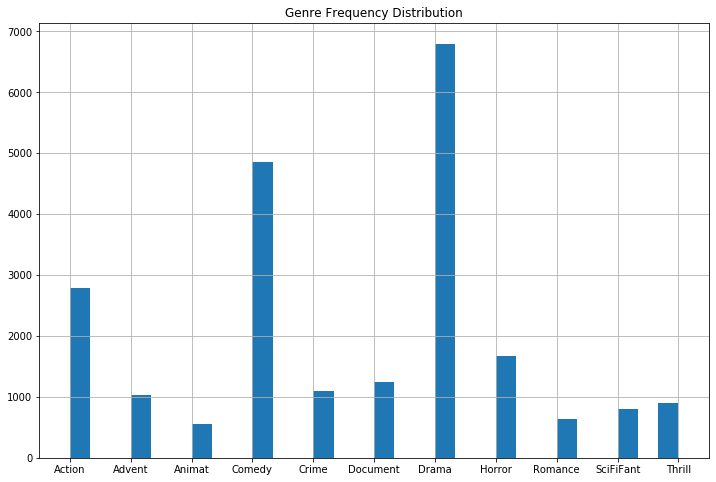

In [1276]:
plt.title('Genre Frequency Distribution')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Action', 'Advent', 'Animat', 'Comedy', 'Crime', 'Document',
                                                'Drama', 'Horror', 'Romance', 'SciFiFant', 'Thrill'])
y_train.hist(bins=30, figsize=(12,8), label='abcdefghijklmnopqrstuv');

In [1277]:
X_test.sample(5)

,lead_actor_le,runtime,ReleaseYear,ReleaseMonth,ReleaseDay,ReleaseMonthDay,',:,american,based,...,want,war,way,wife,woman,work,world,year,york,young
22080,5862,103,2015,10,2,1002,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
7699,787,107,2004,5,14,514,0.0,0.0,0.550840,0.0,...,0.0,0.000000,0.0,0.0,0.369841,0.0,0.000000,0.0,0.0,0.0
7144,10907,84,1975,12,15,1215,0.0,0.0,0.349398,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
16347,7477,200,1981,11,11,1111,0.0,0.0,0.000000,0.0,...,0.0,0.341662,0.0,0.0,0.000000,0.0,0.599718,0.0,0.0,0.0
16060,7607,120,2003,10,6,1006,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.366940,0.0,0.0,0.0


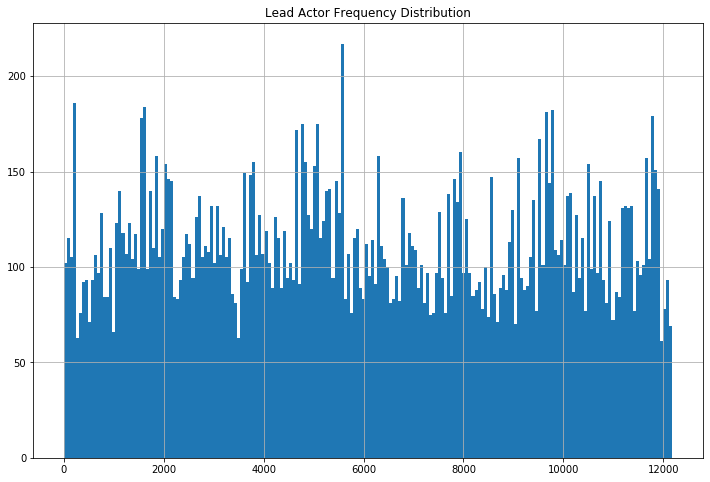

In [1278]:
plt.title('Lead Actor Frequency Distribution')
X_train.iloc[:,0].hist(bins=200, figsize=(12,8));

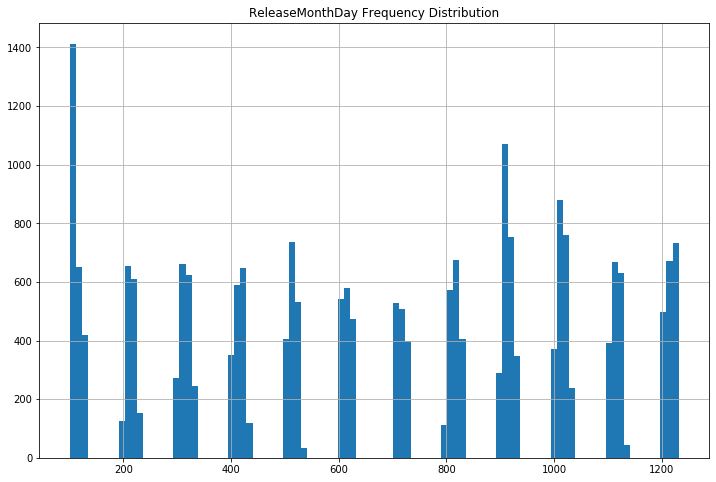

In [1279]:
plt.title('ReleaseMonthDay Frequency Distribution')
X_train.iloc[:,5].hist(bins=100, figsize=(12,8));

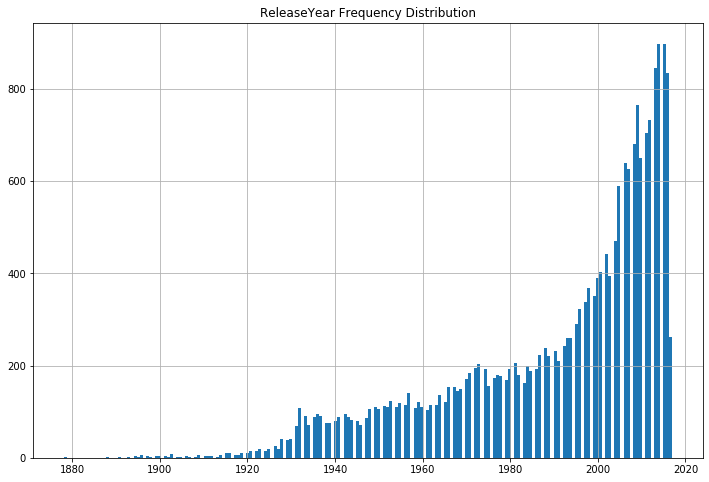

In [1280]:
plt.title('ReleaseYear Frequency Distribution')
X_train.iloc[:,2].hist(bins=200, figsize=(12,8));

In [1281]:
params = {
    'n_estimators' : 100,
    'random_state' : RANDOM_STATE
}

# rfc_and_feature_importances(X, y, params=params)

In [1282]:
flag_to_run_rfc = True

if flag_to_run_rfc == True:
    
    print_timestamp("columns in X_train are {}".format(X_train.columns))

    # Let's now run Random Forest Classification 
    
    params = {
        'n_estimators' : 100,
        'random_state' : RANDOM_STATE
    }

   
    run_rf(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, params=params, cross_validate=True, confusion_matrix=False)
    


2020-05-17 22:54:14: In: <module> columns in X_train are Index(['lead_actor_le', 'runtime', 'ReleaseYear', 'ReleaseMonth', 'ReleaseDay',
       'ReleaseMonthDay', ''', ':', 'american', 'based',
       ...
       'want', 'war', 'way', 'wife', 'woman', 'work', 'world', 'year', 'york',
       'young'],
      dtype='object', length=106) 

2020-05-17 22:54:14: In: run_rf # Inside run_rf, parameters passed were: {'n_estimators': 100, 'random_state': 20200427} 

### Training score = 100.00%

### Test score = 42.97%

###  Metrics test accuracy score = 42.97%

### Cross validation scores:  [0.40393208 0.38516533 0.39678284 0.3896336  0.41733691]

### Accuracy of Model with Cross Validation average is: 39.86%

2020-05-17 22:54:30: In: run_rf End run_rfr part 1 

# Clustering

In [1283]:
#Let's setup the columns for the df_movies clustering

df_movies_for_clustering = df_movies_dataset2
df_movies_for_clustering.drop(['id', 'overview','release_date','title','genre','lead_actor', 'genre_le', 
#                                'budget', 'revenue',
                               'keywords_list', 'overview_keywords'], axis=1, inplace=True)
print("columns in df_movies_dataset are {}".format(df_movies_for_clustering.columns))

scaler = StandardScaler()
all_data = scaler.fit_transform(df_movies_for_clustering)

columns in df_movies_dataset are Index(['budget', 'revenue', 'runtime', 'ReleaseYear', 'ReleaseMonth',
       'ReleaseDay', 'ReleaseMonthDay', 'lead_actor_le', ''', ':',
       ...
       'want', 'war', 'way', 'wife', 'woman', 'work', 'world', 'year', 'york',
       'young'],
      dtype='object', length=108)


In [1284]:
def cluster_dr_plotit(df, y, cluster_type, cluster_params, dr_type, dr_params):

    colours = ['red', 'orange', 'gold', 'lawngreen', 'lightseagreen', 
               'royalblue', 'blueviolet','black','green','navy','fuchsia']
    
    if cluster_type == 'dbscan':
        dbscan_cluster = DBSCAN(**cluster_params)
        clusters = dbscan_cluster.fit_predict(df)
        
    elif cluster_type == 'kmeans':
        kmeans_clusters = KMeans(**cluster_params)
        clusters = kmeans_clusters.fit_predict(df)
        
    elif cluster_type == 'gmm':
        gmm_cluster = GaussianMixture(**cluster_params)
        clusters = gmm_cluster.fit_predict(df)
        
    if dr_type == 'umap':
        results = umap.UMAP(**dr_params).fit_transform(all_data)
        
    elif dr_type == 'pca':
        results = PCA(**dr_params).fit_transform(all_data)
        
    elif dr_type == 'tsne':
        tsne = TSNE(**dr_params)
        results = tsne.fit_transform(all_data)
        
    print_timestamp('Running {} with parameters: {}<br />and {} with parameters: {}'.format(cluster_type, 
                                                                                            cluster_params,
                                                                                            dr_type,
                                                                                            dr_params))
    for i in range(results.shape[0]):
        plt.text(results[i, 0], 
                 results[i, 1], 
                 str(clusters[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50})
    plt.xticks([])
    plt.yticks([])
    plt.axis(True)
    plt.show()

In [ ]:
dbscan_params = {'eps' : 0.5,  'min_samples': 20}
kmeans_params = {'n_clusters' : 11, 'random_state' : RANDOM_STATE}
gmm_params = {'n_components'  : 2, 'random_state' : RANDOM_STATE}

pca_params =  {'n_components' : 2, 'random_state' : RANDOM_STATE}
tsne_params = {'n_components' : 2, 'verbose' : 1, 'perplexity' : 40, 'n_iter' :  300, 'random_state' : RANDOM_STATE}
umap_params = {'n_neighbors' : 10, 'min_dist' : 0.3, 'metric' : 'correlation', 'random_state' : RANDOM_STATE}

print_timestamp("Starting Clustering test")

cluster_dr_plotit(all_data, y, cluster_type='dbscan', cluster_params=dbscan_params, dr_type='pca', dr_params=pca_params)
cluster_dr_plotit(all_data, y, cluster_type='kmeans', cluster_params=kmeans_params, dr_type='pca', dr_params=pca_params)
cluster_dr_plotit(all_data, y, cluster_type='gmm',    cluster_params=gmm_params, dr_type='pca',    dr_params=pca_params)

cluster_dr_plotit(all_data, y, cluster_type='dbscan', cluster_params=dbscan_params, dr_type='tsne', dr_params=tsne_params)
cluster_dr_plotit(all_data, y, cluster_type='kmeans', cluster_params=kmeans_params, dr_type='tsne', dr_params=tsne_params)
cluster_dr_plotit(all_data, y, cluster_type='gmm',    cluster_params=gmm_params, dr_type='tsne',    dr_params=tsne_params)

cluster_dr_plotit(all_data, y, cluster_type='dbscan', cluster_params=dbscan_params, dr_type='umap', dr_params=umap_params)
cluster_dr_plotit(all_data, y, cluster_type='kmeans', cluster_params=kmeans_params, dr_type='umap', dr_params=umap_params)
cluster_dr_plotit(all_data, y, cluster_type='gmm',    cluster_params=gmm_params, dr_type='umap',    dr_params=umap_params)

print_timestamp("Ending Clustering test")

2020-05-17 22:54:30: In: <module> Starting Clustering test 

2020-05-17 22:55:10: In: cluster_dr_plotit Running dbscan with parameters: {'eps': 0.5, 'min_samples': 20}<br />and pca with parameters: {'n_components': 2, 'random_state': 20200427} 